#### 4. 데이터 전처리

- 데이터 전처리는 데이터의 품질을 높이는 중요한 작업
- 데이터 생애주기 : 원시데이터 -> 데이터 전처리 -> 원천 데이터 -> 검증/레이블링 -> 레이블링 데이터
- 데이터 분석을 위한 필수 과정, 분석 결과 오류방지, 분석결과 신뢰도 향상
  
**데이터를 분석 및 처리에 적합한 형태로 만드는 과정을 총칭하는 개념**

- 아무리 좋은 도구나 분석기법도 품질이 낮은 데이터로 좋은 결과를 얻을 수 없다.
- 데이터 전처리 단계 : 데이터 정제 / 데이터 통합 / 데이터 변환 / 데이터 축소

#### 1. 데이터 정제
- 없는 데이터는 채우고, 잡음 데이터는 제거하고, 모순된 데이터는 올바르게 교정
- NaN, null, na 값의 제거
- 누락값, 불일치, 오류 수정
- 컴퓨터로 처리할 수 없는 데이터 제거
- 날짜나 숫자 등의 형식을 일치
- 모순데이터(남자인데 주민번호 8문자가 2인 경우)

#### 2. 데이터 통합
- 출처가 다른 상호 연관성이 있는 여러 데이터들을 하나로 결합하는 과정
- 표현단위가 다른 방식에 대한 일치
- 중복된 데이터를 검출

#### 3. 데이터 변환
- 다양한 형식으로 수집된 데이터를 분석에 용이하도록 일관성있는 데이터 형식으로 변환
- 정규화 : 데이터를 노멀하게 바꿔주는 것. 최대-최소 정규화, z-score 정규화, 소수 스케일링
- 평균화(평활화) : 잡음을 제거하기 위해 데이터범위(추세) 벗어난 값을 변환
- 속성 생성 : 데이터 분포를 대표할 수 있는 새로운 컬럼을 생성

#### 4. 데이터 축소
- 분석에 필요한 데이터를 축소, 고유한 특성은 손상되지 않도록 하고 분석 효율성을 향상키는 작업
- 데이터 압축 : 데이터 인코딩, 데이터 변환을 통해 데이터 포맷 변경
- 차원축소(PCA) : 특정 구간에 분포하는 값으로 스케일 변환

#### 데이터 전처리 절차
- 데이터 오류 분석
  - 결측값, 이상값, 노이즈, 모순 데이터, 불균형 데이터....
- 데이터 전처리 대상 선정
  - 모든 데이터 대상, 비정형/반정형 데이터에 집중.....
- 데이터 전처리 방법 결정
  - 삭제, 대체, 예측값 삽입, Scaling, 변수 추가, 변수 변환.....

##### 데이터 결측값 처리
- 삭제, 대체, 예측값 삽입, 수작업

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- 데이터셋에서 결측값 확인
  - df.info() : 컬럼별 데이터의 수
  - df.isnull() : 결측값이 True
  - df.isnull().sum() : 결측값이 몇개인지 확인

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- 데이터셋에서 결측값 처리 - 삭제
  - df.dropna() : 결측값이 있는 모든 행 삭제
  - df.dropna(axis=0) : 결측값이 있는 행 전체 삭제
  - titanic['embark_town'].dropna() : 'embark_town'열에서 결측값을 삭제하고 출력
  - titanic.dropna( thresh = int( len(titanic) / 2), axis=1) : 전체 데이터셋에서 50%이상 결측치를 포함하는 feature(변수, 필드, 컬럼) 삭제

In [16]:
int( len(titanic) / 2)

445

In [17]:
titanic = titanic.dropna( thresh = int( len(titanic) / 2), axis=1)

In [18]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

- 데이터셋에서 결측값 처리 - 대체
  - df.fillna() : 누락된 값에 통계 값으로 대체 하거나 모든 누락값을 '0'으로 대체
  - df.fillna(0) : 모든 결측값을 0으로 대체
  - df['age'].fillna(0) : 'age' 컬럼의 결측값을 0으로 대체
  - df['age'].fillna( df['age'].mean() ) : 평균값으로 누락값을 대체
  - 수치 데이터는 평균값을 범주형 데이터는 최빈값을 주로 사용
  - 0으로 대체하는 방법은 데이터의 편향(bias)가 발생 가능성이 높다.

C:\Users\kj\AppData\Local\Temp\ipykernel_7252\4273747164.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['age'])


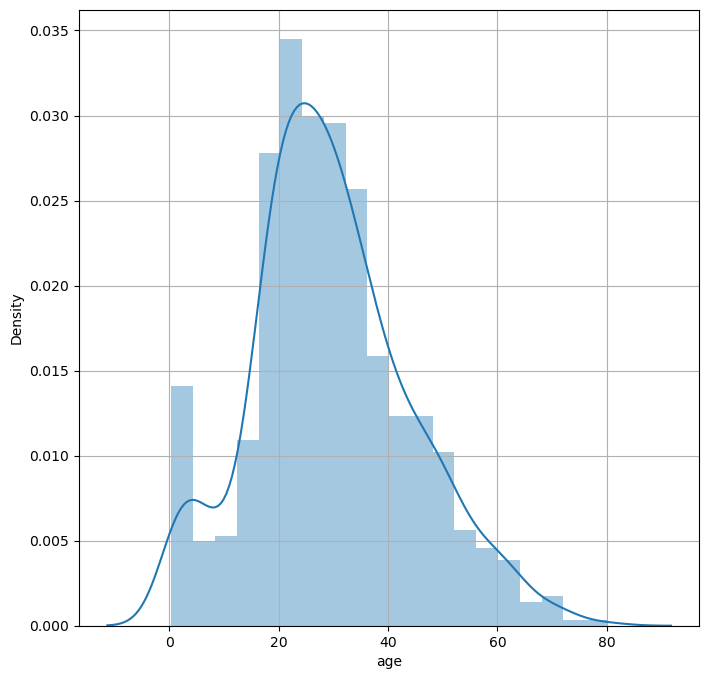

In [20]:
plt.figure(figsize=(8,8))
sns.distplot(titanic['age'])
plt.grid()
plt.show()

In [21]:
# age열의 결측치를 0으로 채움
age0 = titanic['age'].fillna(0)

In [22]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [23]:
age0

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [24]:
titanic['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [25]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


C:\Users\kj\AppData\Local\Temp\ipykernel_7252\2389813882.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age0)


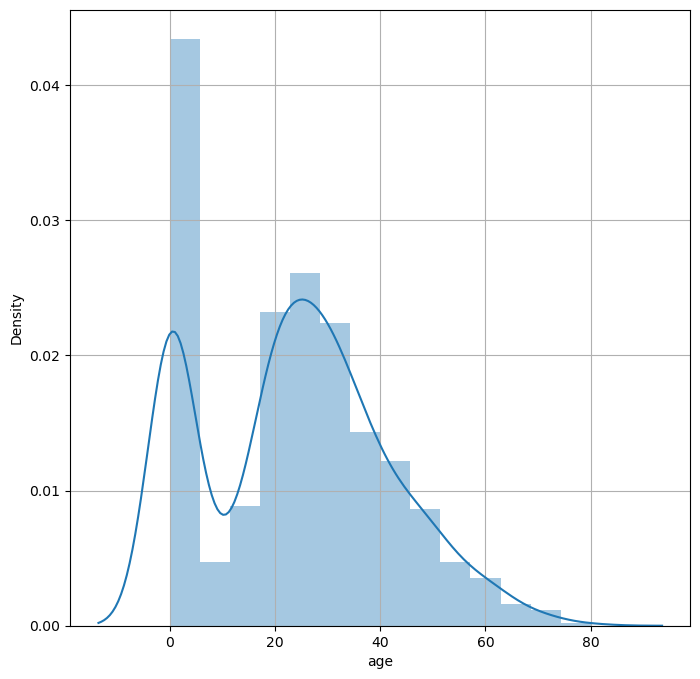

In [26]:
plt.figure(figsize=(8,8))
sns.distplot(age0)
plt.grid()
plt.show()

C:\Users\kj\AppData\Local\Temp\ipykernel_7252\4277732442.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age1)


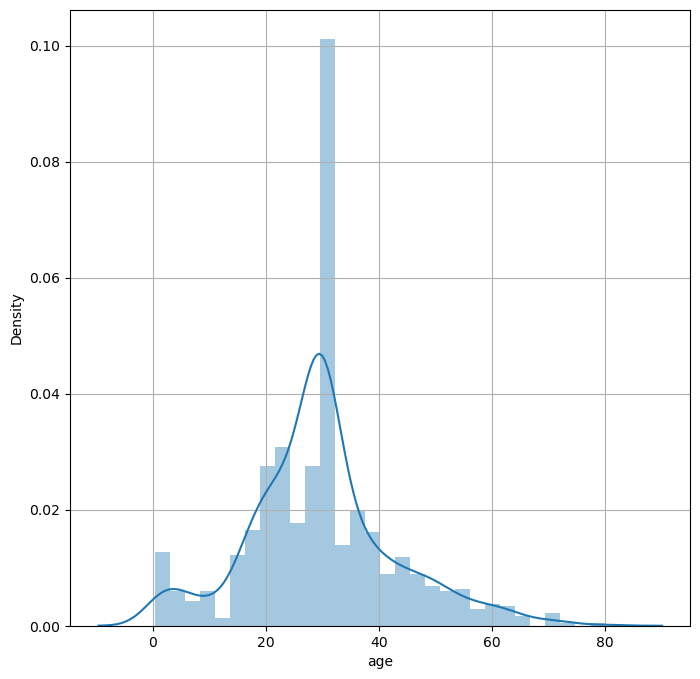

In [27]:
# age열의 결측치를 평균값으로 채움
age1 = titanic.age.fillna(titanic['age'].mean())
plt.figure(figsize=(8,8))
sns.distplot(age1)
plt.grid()
plt.show()

C:\Users\kj\AppData\Local\Temp\ipykernel_7252\990162403.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age1)


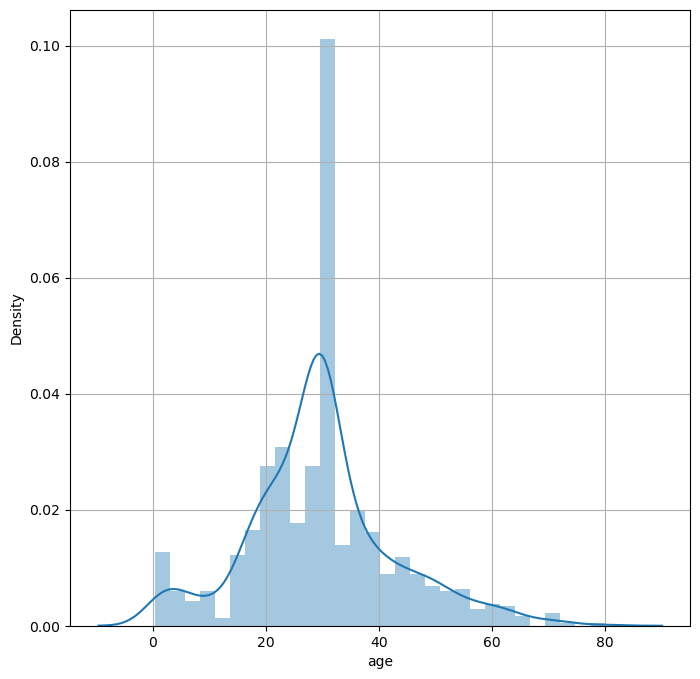

In [28]:
# age열의 결측치를 중앙값으로 채움
age2 = titanic['age'].fillna(titanic['age'].median())
plt.figure(figsize=(8,8))
sns.distplot(age1)
plt.grid()
plt.show()

In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [30]:
titanic.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [31]:
titanic.embarked.value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [32]:
titanic.age.fillna(titanic.age.median(), inplace=True)

In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [34]:
titanic['embark_town'].mode()[0]

'Southampton'

In [35]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [36]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [37]:
titanic.fillna({'embark_town': titanic.embark_town.mode()[0]}, inplace=True)
# titanic.embark_town.fillna(titanic.embark_town.mode()[0], inplace=True)

In [38]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [39]:
titanic.fillna({'embarked': titanic.embarked.mode()[0]}, inplace=True)

In [40]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [41]:
titanic.embark_town.value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

#### 데이터 이상값 처리
- 이상값(Outlier) : 일반적인 다른 값과 멀리 동떨어진 값 (거리, 밀도 기준)

- 이상값이 발생되는 원인
  - 잘못 입력(수집), 고의적인 이상값, 표본 설정 오류

- 이상값 검출 방법
  - ESD(Extrem Studentized Deviation)
    - 평균과 표준편차를 이용해서 이상값의 범위를 한정 ( 평균 => m , 표준편차 => s )
    - m - 3s < 정상데이터 < m + 3s
  - 사분위수 이용
    - Q1 - IQR*1.5 < 정상데이터 < Q3 + IQR * 1.5
  - 기하평균 이용
    - 기하평균 - 2.5s < 정상데이터 < 기하평균 + 2.5s

- 이상값 데이터 확인 : 시각화
  - 히스토그램, 밀도차트 : 평균, 중앙값으로부터 먼 값
  - 박스플롯(상자차트) : 수염 밖으로 이상값이 별도 표시
  - 산포도(scatter) : 다른 값하고 멀리 떨어져 있는 값

- 분석기법을 이용한 이상값 확인
  - 비지도학습의 군집 기법
  - 마할라노비스 거리 : 데이터 분산을 고려한 거리, 다변량 이상값 판단에 대표적인 방법
  - iForest(Isolation forest) : Decision Tree(의사결정 트리), 분할 횟수로 이상값 검출

- 이상값 처리 방법
  - 삭제 : 이상값 포함 데이터 삭제
  - 대체 : 통계값(평균, 최빈값, 중앙값 등)
  - 회귀값 적용 : 회귀모델(결과가 어떤값)의 결과값으로 대체
  - 구간화 : 정렬된 데이터를 여러 개의 구간으로 배분한 후 구간 대표값으로 대체
  - 군집화 : 비슷한 성격을 가진 클러스터 단위로 묶은 다음 처리
  - 변환 : 오른쪽 꼬리가 긴 경우 => 로그변환, 제곱근 변환으로 큰 값을 작게 만들기
           왼쪽 꼬리가 긴 경우 => 지수변환, 제곱변환으로 작은 값을 크게 만들기

##### 데이터 이상값 영향도
- 이상값 영향을 많이 받는 것
  - 평균, 분산, 표준편차, 범위 등
  - 앙상블 : Boosting
  - 비지도 : 군집 -> K-means
- 이상값 영향을 적게 받는 것
  - 중앙값
  - 지도 : 분류/회귀 -> KNN
  - 비지도 : 군집 -> DBSCAN

- 밀도 기반 : 특정 반경안에 데이터가 몇개 있는지를 세는 방법

In [49]:
# 이상값과 평균, 중앙값의 영향도
data1 = [10, 20, 30, 40, 50]
data2 = [10, 20, 30, 40, 200]
a = pd.Series(data1)
b = pd.Series(data2)
print('평균 : ', a.mean(), b.mean())
print('중앙값 : ', a.median(), b.median())

평균 :  30.0 60.0
중앙값 :  30.0 30.0


In [50]:
# 이상값 탐색
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- 기초 통계량 : 평균, 표준편차, 사분위수, 최대, 최소
- describe() 함수

In [52]:
res = titanic.describe()

In [53]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
res['age']['75%']

38.0

In [55]:
# 클래스별로 운임을 표시하는 distplot 작성
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\kj\AppData\Local\Temp\ipykernel_7252\287116824.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == (i+1)]['fare'], axlabel=class_names[i])
C:\Users\kj\AppData\Local\Temp\ipykernel_7252\287116824.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titani

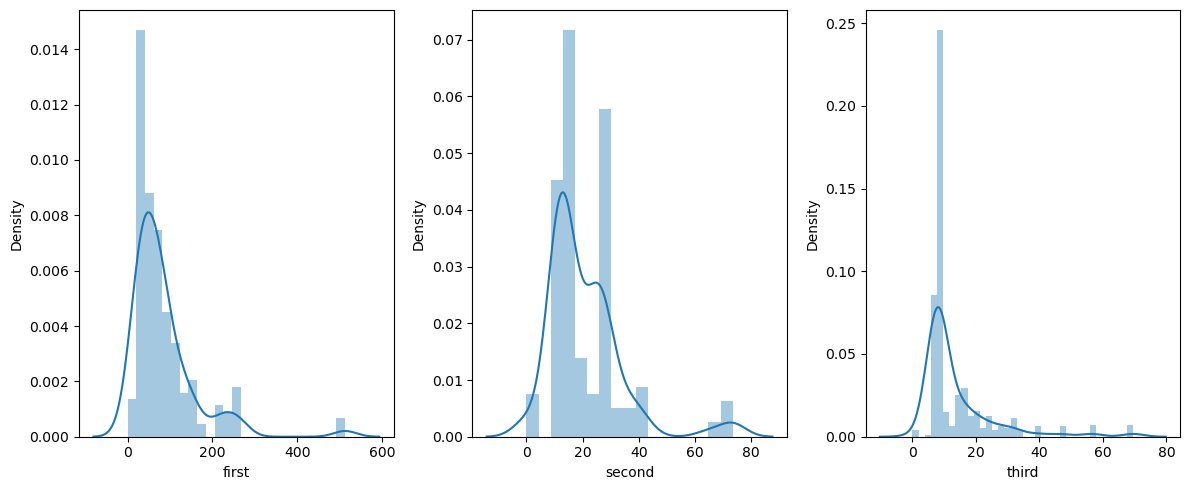

In [56]:
class_names = ['first', 'second', 'third']
plt.figure(figsize=(12,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.distplot(titanic[titanic.pclass == (i+1)]['fare'], axlabel=class_names[i])
plt.tight_layout()
plt.show()

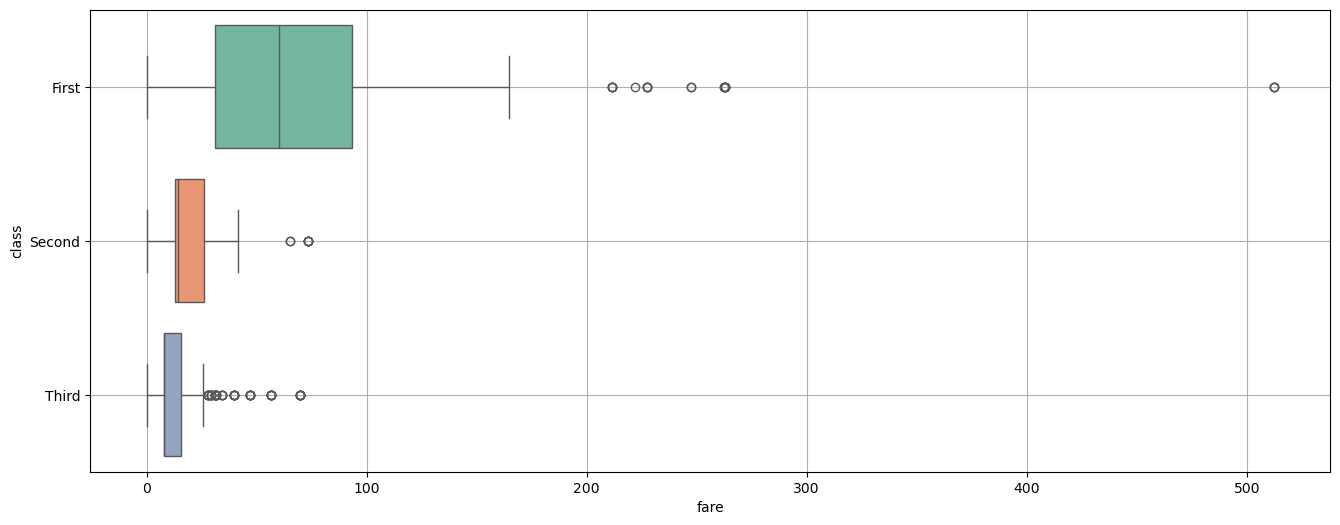

In [57]:
# class별 요금을 가로 박스플롯으로 그려서 이상값을 확인
plt.figure(figsize=(16,6))
sns.boxplot(x='fare', y='class', orient='h', data=titanic, palette='Set2', hue='class')
plt.grid()
plt.show()

In [58]:
titanic.fare.sort_values(ascending=False).head(30)

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
341    263.0000
438    263.0000
311    262.3750
742    262.3750
118    247.5208
299    247.5208
557    227.5250
700    227.5250
380    227.5250
716    227.5250
527    221.7792
377    211.5000
730    211.3375
779    211.3375
689    211.3375
318    164.8667
856    164.8667
268    153.4625
332    153.4625
609    153.4625
498    151.5500
305    151.5500
297    151.5500
708    151.5500
195    146.5208
Name: fare, dtype: float64

In [59]:
titanic.fare.sort_values(ascending=True).head(30)

271    0.0000
597    0.0000
302    0.0000
633    0.0000
277    0.0000
413    0.0000
674    0.0000
263    0.0000
466    0.0000
732    0.0000
179    0.0000
806    0.0000
481    0.0000
822    0.0000
815    0.0000
378    4.0125
872    5.0000
326    6.2375
843    6.4375
818    6.4500
371    6.4958
202    6.4958
654    6.7500
143    6.7500
411    6.8583
825    6.9500
129    6.9750
804    6.9750
477    7.0458
611    7.0500
Name: fare, dtype: float64

In [60]:
# tips 데이터셋에서 tip 값의 이상치 탐색
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


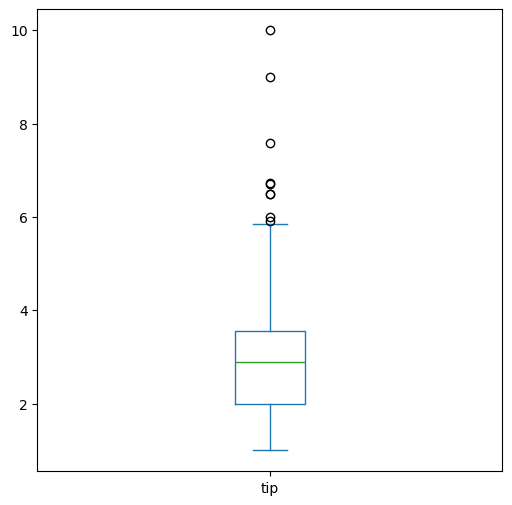

In [61]:
tips['tip'].plot.box(figsize=(6,6))
plt.show()

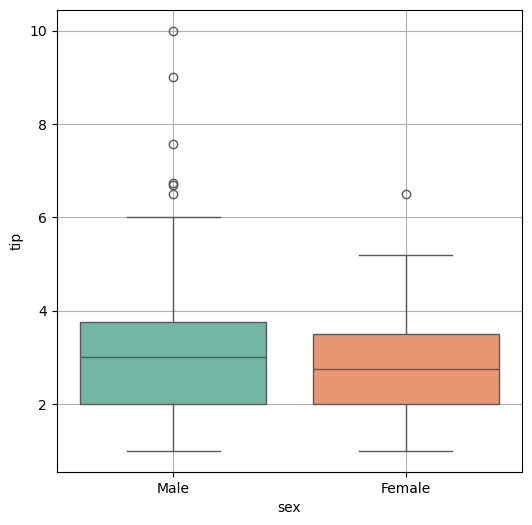

In [62]:
plt.figure(figsize=(6,6))
sns.boxplot(x='sex', y='tip', orient='v', data=tips, palette='Set2', hue='sex')
plt.grid()
plt.show()

#### 이상값 처리

- ESD를 이용해서 이상값의 범위 확인( 평균 : m, 표준편차 : s )
  - m - 3s < 정상범위 < m + 3s

In [65]:
# tips 데이터셋의 tip 의 정상값의 범위의 하한값과 상한값을 계산 출력
t_mean, t_std = tips['tip'].mean(), tips['tip'].std()
print(f'Lower : {round(t_mean - 3 * t_std, 2 )}, Upper : {round(t_mean + 3 * t_std, 2)} ')

Lower : -1.15, Upper : 7.15 


- 사분위수를 이용해서 정상값의 범위 확인
  - Q1 - IQR * 1.5 < 정상범위 < Q3 + IQR * 1.5

In [67]:
s = tips['tip']
Q1, Q3 = s.quantile([0.25 , 0.75])
IQR = Q3 - Q1
q_lower = Q1 - IQR * 1.5
q_upper = Q3 + IQR * 1.5
print(f'하한값 : {q_lower}, 상한값 : {q_upper}')

하한값 : -0.34375, 상한값 : 5.90625


In [68]:
# tips2 데이터프레임에 정상범위에 있는 값만 추출, tips 와 샘플차이 확인
tips2 = tips[ (tips['tip'] > q_lower ) & (tips['tip'] < q_upper)]

In [69]:
len(tips2)

235

In [70]:
tips2.shape

(235, 7)

In [71]:
print(tips.shape, tips2.shape)

(244, 7) (235, 7)


In [72]:
# 이상값 데이터들의 값목록 출력
tips_outlier = tips[(tips['tip']<=q_lower) | (tips['tip']>=q_upper)]
tips_outlier

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [73]:
len(tips_outlier)

9

In [74]:
tips4 = tips.copy()
tips4.loc[ (tips4['tip'] > q_upper) | ( tips4['tip'] < q_lower ) ]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [75]:
# 이상값 대체 - q_lower보다 작은 값은 q_lower로 q_upper보다 큰 값은 q_upper로 대체
tips3 = tips.copy()
tips3.loc[tips3['tip'] > q_upper, 'tip'] = q_upper
tips3.loc[tips3['tip'] < q_lower, 'tip'] = q_lower
tips3.loc[ (tips3['tip'] > q_upper) | ( tips3['tip'] < q_lower ) ]

,total_bill,tip,sex,smoker,day,time,size


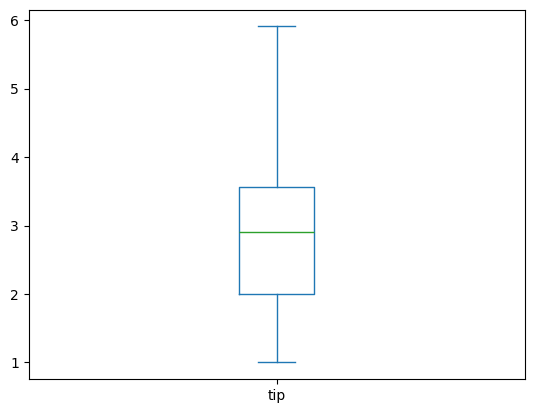

In [76]:
# tips의 tip의 값을 box 플롯으로 확인해서 이상값 확인
tips3['tip'].plot.box()
plt.show()

- 전처리 기법 중 데이터 변환, 데이터 스케일링, 변수 추가 및 변수 변환

1. 데이터 변환(Transform)
- 데이터의 값 자체를 바꾼다는 것
- 이상치를 완화하거나, 정규분포가 되도록 하기 위해 사용
- 머신러닝이 학습하기 좋도록 하는 목적도 있고, 학습이 잘 되도록 하기 위함
- 대부분의 모델은 변수가 특정 분포(정규분포에 가까운)를 따른다는 가정을 기반
- 데이터 분포에 따라 로그, 루트, 지수, 거듭제곱 등 다양한 함수를 사용하여 데이터 분포 변환(numpy활용)

##### 데이터 변환에 사용되는 함수
- 로그(log1p), 제곱근(sqrt) : 큰 값을 작게 만들어 줌, 오른쪽 꼬리가 긴 분포를 정규분포와 비슷한 형태로 변환, 큰 이상치를 작게 만들 수 있음
- 익스포넨셜(expm1), 제곱(power) : 작은 값을 크게 만들어 줌, 왼쪽 꼬리가 긴 분포를 정규분포와 비슷한 형태로 변환

In [152]:
def draw_distplot(col_name):
    class_names = ['first', 'second', 'third']
    plt.figure(figsize=(12,5))
    for i in range(0,3):
        plt.subplot(1,3,i+1)
        sns.distplot(titanic[titanic.pclass == (i+1)][col_name], axlabel = class_names[i])
    plt.tight_layout()
    plt.show()

C:\Users\kj\AppData\Local\Temp\ipykernel_7252\425490978.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == (i+1)][col_name], axlabel = class_names[i])
C:\Users\kj\AppData\Local\Temp\ipykernel_7252\425490978.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[ti

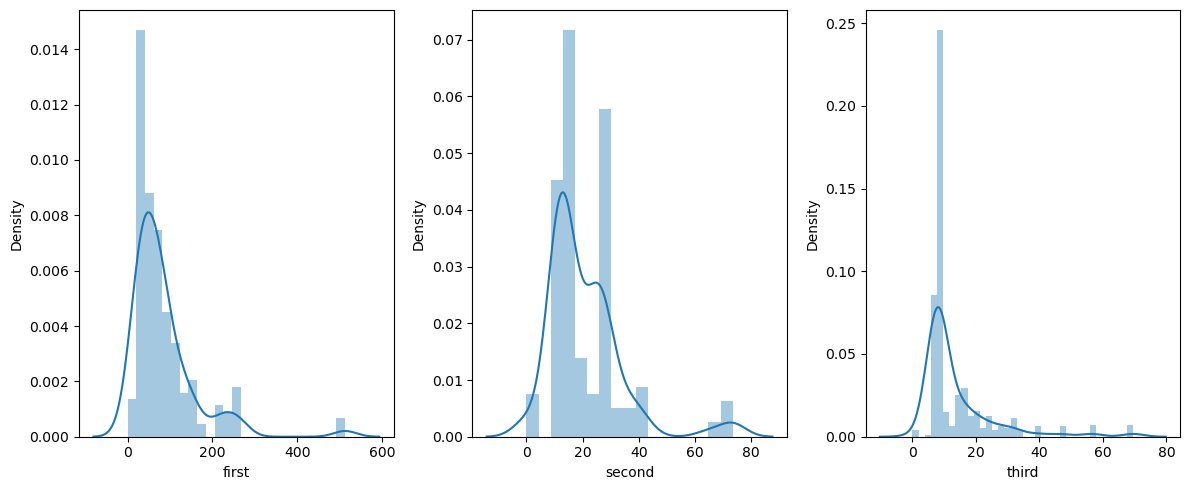

In [154]:
draw_distplot('fare')

In [156]:
titanic.fare.skew()

4.787316519674893

In [158]:
titanic.fare.kurt()

33.39814088089868

In [160]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [162]:
from sklearn import preprocessing

In [164]:
a = np.log1p(titanic.fare)
b = preprocessing.scale(np.log1p(titanic.fare))

In [168]:
print(type(a), type(b))

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [170]:
a

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: fare, Length: 891, dtype: float64

In [172]:
b

array([-0.87974057,  1.36121993, -0.79853997,  1.06203806, -0.78417924,
       -0.7386163 ,  1.03814556,  0.13649914, -0.48145578,  0.48943791,
       -0.091565  ,  0.36526094, -0.78417924,  0.52869893, -0.80676338,
       -0.13322852,  0.45751954, -0.33369847, -0.01838584, -0.88287417,
        0.34443948, -0.33369847, -0.78655506,  0.65571883,  0.13649914,
        0.53229169, -0.88287417,  2.69870078, -0.80385215, -0.80192362,
        0.40823345,  2.09779492, -0.81898658, -0.53680577,  1.50608578,
        1.04082775, -0.88234706, -0.78417924, -0.01838584, -0.47227212,
       -0.63319725,  0.13298517, -0.80192362,  0.81478225, -0.80385215,
       -0.78417924, -0.1640523 , -0.81898658,  0.16437971, -0.02931208,
        0.76785943, -0.81310326,  1.43621998,  0.34443948,  1.21895045,
        0.65571883, -0.53680577, -0.88234706,  0.40928266,  0.93636109,
       -0.88234706,  1.47877855,  1.52215108,  0.41465572,  0.40823345,
       -0.18008317, -0.53680577, -0.77189658, -0.79853997, -0.71

In [174]:
titanic['fare_log'] = preprocessing.scale(np.log1p(titanic.fare))
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.879741
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.361220
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.798540
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.062038
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,-0.784179


C:\Users\kj\AppData\Local\Temp\ipykernel_7252\425490978.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == (i+1)][col_name], axlabel = class_names[i])
C:\Users\kj\AppData\Local\Temp\ipykernel_7252\425490978.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[ti

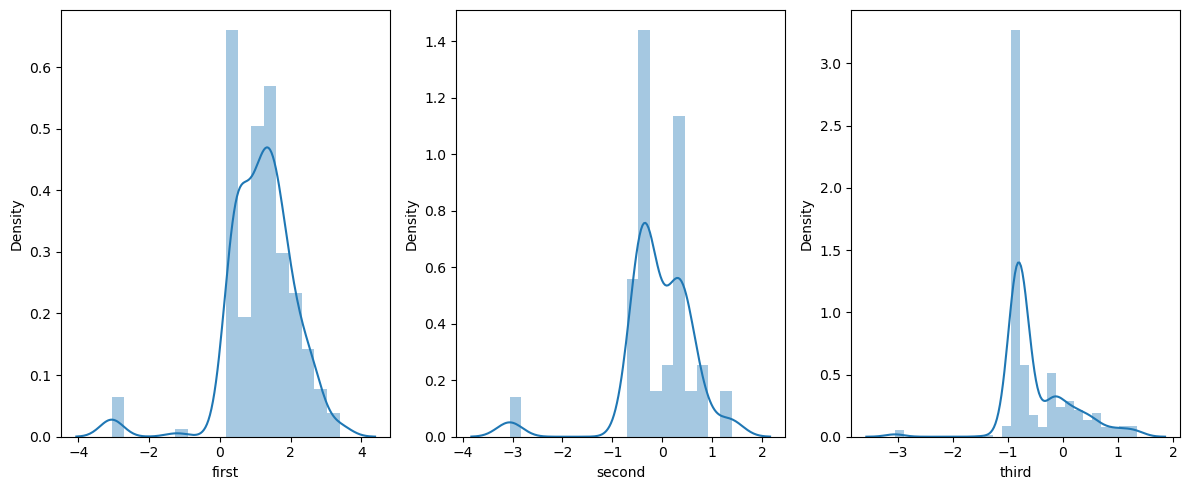

In [178]:
draw_distplot('fare_log')

In [180]:
titanic.fare_log.skew()

0.394928009518931

In [182]:
titanic.fare_log.kurt()

0.9761421066831049

- feature engineering(피처 엔지니어링) : 모델 학습 성능을 높이기 위해 feature를 조작하거나 추가하는 것

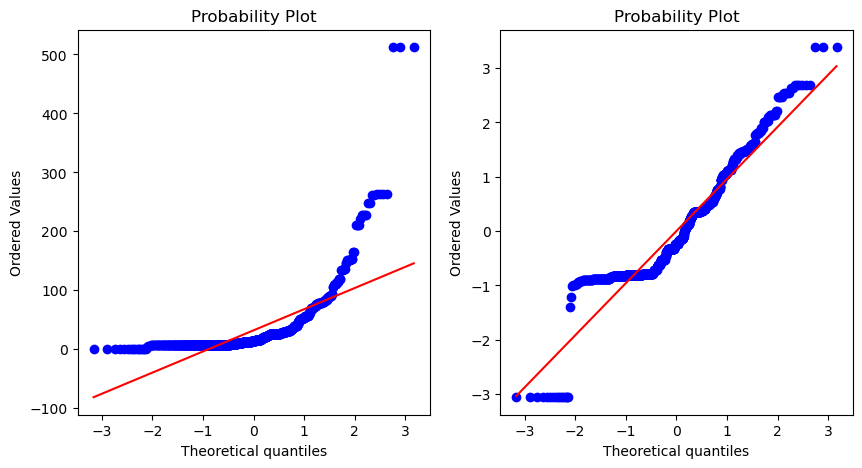

In [191]:
from scipy import stats
fig = plt.figure(figsize=(10,5))
fig.add_subplot(1, 2, 1)
res = stats.probplot(titanic['fare'], plot = plt)
fig.add_subplot(1, 2, 2)
res = stats.probplot(titanic['fare_log'], plot = plt)

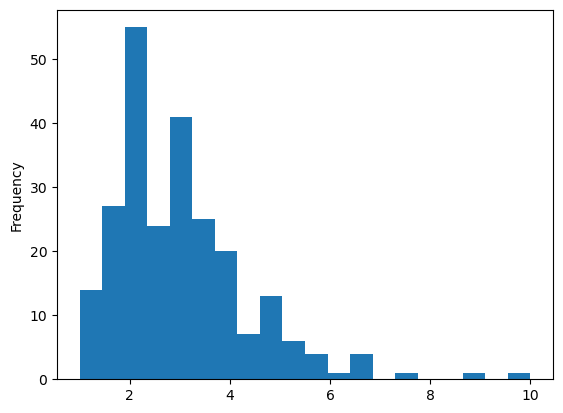

In [193]:
# tips 데이터셋을 이용해서 tip 컬럼의 분포를 시각화 해서 확인해보고 정규분포에 가깝게 만들기 위해 로그 변환하여 시각화
t = tips['tip']
t.plot.hist(bins=20)
plt.show()

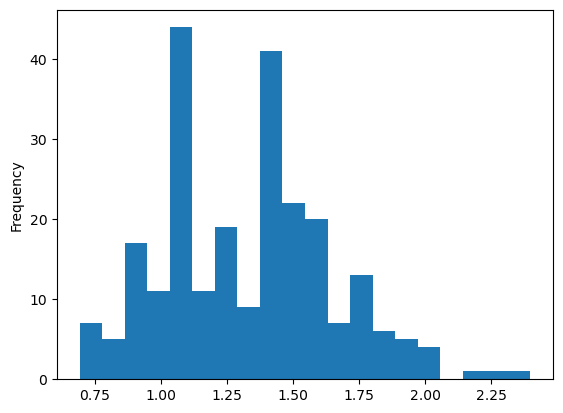

In [195]:
t = np.log1p(tips['tip'])
t.plot.hist(bins=20)
plt.show()

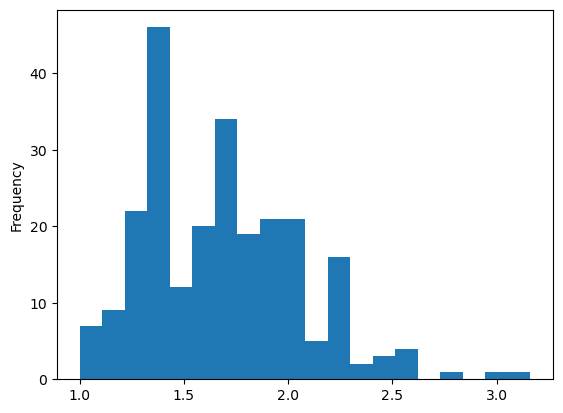

In [201]:
t = np.sqrt(tips['tip'])
t.plot.hist(bins=20)
plt.show()

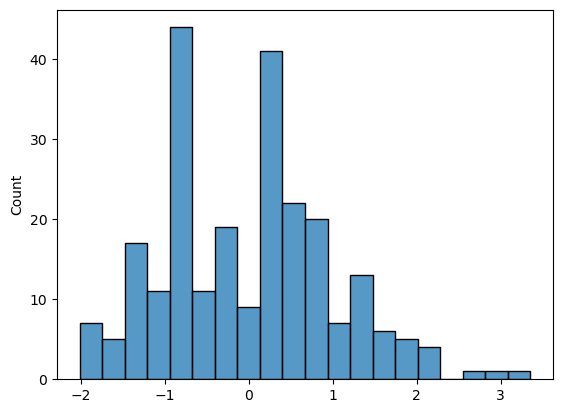

In [199]:
t = preprocessing.scale(np.log1p(tips['tip']))
sns.histplot(t, bins=20)
plt.show()

In [203]:
a = tips['tip']
b = np.log1p(a)
c = np.expm1(b)
print(a[:3], b[:3], c[:3], sep='\n\n')

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64

0    0.698135
1    0.978326
2    1.504077
Name: tip, dtype: float64

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64


In [205]:
a = tips['tip']
b = np.sqrt(a)
c = np.power(b, 2)
print(a[:3], b[:3], c[:3], sep='\n\n')

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64

0    1.004988
1    1.288410
2    1.870829
Name: tip, dtype: float64

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64


#### 2. 데이터 스케일링
- 분석 목적에 맞게 데이터를 변화하는 과정
- 학습 전 데이터 스케일링을 통해 값의 범위를 표준정규분포를 갖도록 변환하거나, 0 ~ 1로 변환
- 종류 : MinMaxScaling, StandardScaling, RobustScaling

##### 1) MinMaxScaling
- 최소최대 정규화, 두 극단 사이의 모든 데이터를 특정 구간(0~1)으로 모든 데이터를 변환하여 표준화
- 스케일된 값 = (데이터값 - 최소값) / (최대값 - 최소값)

In [220]:
x = np.random.uniform(low=30, high = 50, size=[10000, 1])
scaler = preprocessing.MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled

array([[0.12044735],
       [0.49891375],
       [0.20209843],
       ...,
       [0.5297267 ],
       [0.78260668],
       [0.16403622]])

In [222]:
x

array([[32.40956056],
       [39.97744168],
       [34.04227002],
       ...,
       [40.59358287],
       [45.65021577],
       [33.28117134]])

##### 2) StandardScaling
- 평균이 0, 분산이 1인 표준정규분포(z-분포)로 변환
- z = (데이터값 - 평균) / 표준편차

In [225]:
x = np.random.uniform(low=30, high = 50, size=[10000, 1])
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled

array([[-1.29868215],
       [ 1.11160462],
       [ 0.99017153],
       ...,
       [ 1.16822443],
       [ 0.20734563],
       [ 0.824583  ]])

##### 3) RobustScaling
- 중앙값과 IQR 사용
- 데이터셋에 아웃라이어가 들어있을 때 Robust하게 표준화 할 수 있는 방법
- 아웃라이어 영향을 최소화하는 방법
- 중앙값을 뺀 다음에 IQR로 나누어 특징벡터 반환

In [246]:
df = pd.DataFrame([ 
    [2, 1, 3], [3, 2, 5], [3, 4, 7], [5, 5, 10], [7, 5, 12], [2, 5, 7],[8, 9, 13], [9, 10, 13],
    [6, 12, 12], [9, 2, 13] ], columns=['hour', 'attendance', 'score'])
x_data = df.drop(['score'], axis=1 )
y_data = df['score']
robust = preprocessing.RobustScaler()
robust.fit(x_data)
scaled_x = robust.transform(x_data)
scaled_x

array([[-0.73684211, -0.72727273],
       [-0.52631579, -0.54545455],
       [-0.52631579, -0.18181818],
       [-0.10526316,  0.        ],
       [ 0.31578947,  0.        ],
       [-0.73684211,  0.        ],
       [ 0.52631579,  0.72727273],
       [ 0.73684211,  0.90909091],
       [ 0.10526316,  1.27272727],
       [ 0.73684211, -0.54545455]])

In [244]:
x_data

,hour,attendance
0,2,1
1,3,2
2,3,4
3,5,5
4,7,5
5,2,5
6,8,9
7,9,10
8,6,12
9,9,2


In [249]:
def minmaxScale(x):
    return (x - x.min()) / (x.max() - x.min() )

In [251]:
def standardScale(x):
    return (x - x.mean() ) / x.std()

In [253]:
x = minmaxScale(tips['tip'])
print( x.max(), x.min() )

1.0 0.0


In [257]:
x = standardScale(tips['tip'])
print( x.max(), x.min() )
print( x.mean(), x.std() )

5.060370093232102 -1.4442205371384713
2.5844535983077414e-16 0.9999999999999999


In [264]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [268]:
x = MinMaxScaler().fit_transform(tips[['tip']])
print(x.min(), x.max() )

0.0 1.0


#### 3. 변수 추가 / 변수 변환
- 파생 변수 => 새로운 변수가 만들어지는 것
  - 기존 변수를 조합하거나, 특정 조건 혹은 함수 등을 적용해서 새롭게 만든 변수
  - 상관관계가 있는 변수들끼리 결합하여 분산을 극대화하는 변수로 만들어 변수를 축약하여 희생되는 정보가 최소화
  - 데이터에 포함된 나이인 연속형 변수를 이용해 연령대 범주형 변수 생성
  - 요약 통계량을 이용한 변수 생성
- 파생 변수 생성 방법 : 단위 변환, 요약 통계량 변환, 변수 분해, 변수 결합
  - 단위 변환 : 변수의 단위 또는 척도 변환
  - 요약 통계량 변환 : 통계량을 계산해서 생성
  - 변수 분해 : 하나의 정보에서 다른 정보를 얻어 내는 방법(주민번호 -> 성별, 날짜 -> 년, 월, 일)
  - 변수 결합 : 다양한 함수를 이용해서 수학적 결합을 통해 새로운 변수 생성(키, 몸무게를 이용 => BMI 계산)

In [274]:
# tips 데이터셋에서 total_bill, size 이 두개의 컬럼을 이용해서 per_one_bill 파생 변수 생성
tips['per_one_bill'] = round(tips.total_bill / tips.size , 2 )
tips.head()

,total_bill,tip,sex,smoker,day,time,size,per_one_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.01
1,10.34,1.66,Male,No,Sun,Dinner,3,0.01
2,21.01,3.50,Male,No,Sun,Dinner,3,0.01
3,23.68,3.31,Male,No,Sun,Dinner,2,0.01
4,24.59,3.61,Female,No,Sun,Dinner,4,0.01


##### 변수 변환
- 분석 목적에 맞게 데이터를 변환하는 과정
- 머신러닝의 최적화 모델 작업이 쉬워짐
- 문자로된 입력데이터를 숫자로 변경
- 부호화(Encoding), 구간화(Binning)

##### 1) Encoding( 범주형 -> 수치형 ) 변환
- 하나의 범주에 대해서 하나의 숫자로 매칭하는 방법
- 값을 일련번호로 변경
- 요일, 학점 등
- Label Encoding, One hot Encoding

- Label Encoding : 대응되는 값으로 1:1 변환
- One hot Encoding : 범주의 개수 만큼 feature를 만들어 냄(feature -> 더미변수)

##### 2) Binning( 수치형 -> 범주형 ) 변환
- 연속형 변수를 구간을 이용해서 범주형(Category)형태의 변수로 바꾸는 것
- 정보가 압축되고 단순해져서 정확도 하락
- 이상치 해결 방법 중 한 가지로 사용하거나, 오버피팅(Overfitting - 과대적합) 방지
- pd.cut()

##### 3) 실수형 변수 변환
- 범주형 변수를 수치형 변수로 변경하는 것
- Label Encoding : 값의 일련번호로 변경, Category 타입의 cat.codes, Series.replace() => 순서가 있는 경우
- One hot Encoding : 범주의 개수만큼 feature를 만들어 냄. pd.get_dummies() => 순서가 없는 경우

In [297]:
df = pd.DataFrame({'A':['월', '화', '수', '화', '수', '금','월'], 
                   'B':['여자', '남자', '여자', '남자', '남자', '남자', '여자']} )
df

,A,B
0,월,여자
1,화,남자
2,수,여자
3,화,남자
4,수,남자
5,금,남자
6,월,여자


In [299]:
# Label Encoding
weekdays = '월 화 수 목 금 토 일'.split(' ')
print(weekdays)

['월', '화', '수', '목', '금', '토', '일']


In [301]:
type(weekdays)

list

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       7 non-null      object
 1   B       7 non-null      object
dtypes: object(2)
memory usage: 244.0+ bytes


In [305]:
A_order = pd.Categorical(df['A'], weekdays, ordered=True)
A_unorder = pd.Categorical(df['A'], weekdays, ordered=False)
print(A_order)

['월', '화', '수', '화', '수', '금', '월']
Categories (7, object): ['월' < '화' < '수' < '목' < '금' < '토' < '일']


In [307]:
A_unorder

['월', '화', '수', '화', '수', '금', '월']
Categories (7, object): ['월', '화', '수', '목', '금', '토', '일']

In [311]:
print(type(A_unorder))

<class 'pandas.core.arrays.categorical.Categorical'>


In [313]:
df['A_Result'] = pd.Categorical(df['A'], weekdays, ordered=True)
df

,A,B,A_Result
0,월,여자,월
1,화,남자,화
2,수,여자,수
3,화,남자,화
4,수,남자,수
5,금,남자,금
6,월,여자,월


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   A         7 non-null      object  
 1   B         7 non-null      object  
 2   A_Result  7 non-null      category
dtypes: category(1), object(2)
memory usage: 607.0+ bytes


In [317]:
df['A_Result'] = df['A_Result'].cat.codes
df

,A,B,A_Result
0,월,여자,0
1,화,남자,1
2,수,여자,2
3,화,남자,1
4,수,남자,2
5,금,남자,4
6,월,여자,0


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   A         7 non-null      object
 1   B         7 non-null      object
 2   A_Result  7 non-null      int8  
dtypes: int8(1), object(2)
memory usage: 251.0+ bytes


In [321]:
df['B_Result'] = df['B'].replace(['남자', '여자'], [1, 2])
df

C:\Users\kj\AppData\Local\Temp\ipykernel_7252\3489341832.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['B_Result'] = df['B'].replace(['남자', '여자'], [1, 2])


,A,B,A_Result,B_Result
0,월,여자,0,2
1,화,남자,1,1
2,수,여자,2,2
3,화,남자,1,1
4,수,남자,2,1
5,금,남자,4,1
6,월,여자,0,2


In [323]:
# one hot encoding
a = pd.get_dummies(df['A'])
a

,금,수,월,화
0,False,False,True,False
1,False,False,False,True
2,False,True,False,False
3,False,False,False,True
4,False,True,False,False
5,True,False,False,False
6,False,False,True,False


In [341]:
b = pd.get_dummies(df['B']).astype('int')
b

,남자,여자
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0
6,0,1


In [327]:
df.head()

,A,B,A_Result,B_Result
0,월,여자,0,2
1,화,남자,1,1
2,수,여자,2,2
3,화,남자,1,1
4,수,남자,2,1


In [331]:
df2 = pd.concat([df, a, b], axis=1)
df2

,A,B,A_Result,B_Result,금,수,월,화,남자,여자
0,월,여자,0,2,False,False,True,False,False,True
1,화,남자,1,1,False,False,False,True,True,False
2,수,여자,2,2,False,True,False,False,False,True
3,화,남자,1,1,False,False,False,True,True,False
4,수,남자,2,1,False,True,False,False,True,False
5,금,남자,4,1,True,False,False,False,True,False
6,월,여자,0,2,False,False,True,False,False,True


In [333]:
X = df2[['A_Result', '남자', '여자']]
X

,A_Result,남자,여자
0,0,False,True
1,1,True,False
2,2,False,True
3,1,True,False
4,2,True,False
5,4,True,False
6,0,False,True


In [335]:
df

,A,B,A_Result,B_Result
0,월,여자,0,2
1,화,남자,1,1
2,수,여자,2,2
3,화,남자,1,1
4,수,남자,2,1
5,금,남자,4,1
6,월,여자,0,2


In [343]:
df3 = pd.get_dummies(df).astype('int')
df3

,A_Result,B_Result,A_금,A_수,A_월,A_화,B_남자,B_여자
0,0,2,0,0,1,0,0,1
1,1,1,0,0,0,1,1,0
2,2,2,0,1,0,0,0,1
3,1,1,0,0,0,1,1,0
4,2,1,0,1,0,0,1,0
5,4,1,1,0,0,0,1,0
6,0,2,0,0,1,0,0,1


- 범주형 변수 변환(Binnig) : 구간화

In [346]:
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
df = pd.DataFrame(data, columns=['data'])
df['data'].to_list()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [348]:
df

,data
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [356]:
# Binning(구간화) 만들기
# 0~3, 4~6, 7~9 에 대한 구간화, 각 구역에 대한 레이블 : A, B, C
# df['result_A'] = pd.cut(df['data'], [0, 3, 6, 9], labels=['A', 'B', 'C'], right=True)
Min, Max = df['data'].min(), df['data'].max()
df['result_A'] = pd.cut(df['data'], [Min-1, 3, 6, Max], labels=['A', 'B', 'C'], right=True)
df['result_B'] = pd.cut(df['data'], [Min, 3, 6, Max+1], labels=[0, 1, 2], right=False)
df

,data,result_A,result_B
0,0,A,0
1,1,A,0
2,2,A,0
3,3,A,1
4,4,B,1
5,5,B,1
6,6,B,2
7,7,C,2
8,8,C,2
9,9,C,2


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   data      10 non-null     int64   
 1   result_A  10 non-null     category
 2   result_B  10 non-null     category
dtypes: category(2), int64(1)
memory usage: 496.0 bytes


In [360]:
df['result_C'] = df['result_A'].cat.codes
df

,data,result_A,result_B,result_C
0,0,A,0,0
1,1,A,0,0
2,2,A,0,0
3,3,A,1,0
4,4,B,1,1
5,5,B,1,1
6,6,B,2,1
7,7,C,2,2
8,8,C,2,2
9,9,C,2,2


- EDA(탐색적 데이터 분석)와 상관분석